In [38]:
import pandas as pd
import rasterio
import os
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 1. Cargar el dataset
df = pd.read_csv("C:/Users/jonny/Documentos/MAESTRIA/TESIS/datos_final.csv", delimiter=",")

In [39]:
# 2. Análisis exploratorio de datos
## 2.1 Estadísticas descriptivas
desc_stats = df.describe()
print("Estadísticas descriptivas del dataset:")
print(desc_stats)

Estadísticas descriptivas del dataset:
                id         anio       banda1       banda2       banda3  \
count  8783.000000  8783.000000  8783.000000  8783.000000  8783.000000   
mean   4392.000000  2019.331663     0.055124     0.085077     0.086664   
std    2535.578041     3.073510     0.038657     0.044678     0.059908   
min       1.000000  2015.000000     0.000186     0.004600     0.000000   
25%    2196.500000  2018.000000     0.023960     0.053234     0.035771   
50%    4392.000000  2020.000000     0.045382     0.074835     0.078052   
75%    6587.500000  2022.000000     0.080321     0.112441     0.130426   
max    8783.000000  2024.000000     0.394852     0.467288     0.487527   

               lst         ndvi         ndbi  
count  8783.000000  8783.000000  8783.000000  
mean     38.291170     0.230807     0.013274  
std       7.133021     0.499366     0.367857  
min      25.469849    -1.000000    -0.965072  
25%      31.401260     0.108160    -0.250613  
50%      39.

In [40]:
df.head()

,id,ciudad,cobertura,anio,banda1,banda2,banda3,lst,ndvi,ndbi,geometria,geometria_final
0,1,cartagena,Suelo desnudo,2024,0.055200,0.080225,0.102527,43.376495,0.417255,0.188159,POINT (-75.41885372572344 10.535864821524362),POINT(-75.41885372572344 10.535864821524362)
1,2,cartagena,Construcciones,2018,0.135857,0.165558,0.178400,43.095612,0.111427,0.129208,POINT (-75.52288977080553 10.446074052609852),POINT(-75.52288977080553 10.446074052609852)
2,3,cartagena,Agua de mar,2018,0.032182,0.068043,0.044227,28.804047,-0.984380,0.721558,POINT (-75.50491426809783 10.501270627074506),POINT(-75.50491426809783 10.501270627074506)
3,4,santa_marta,Construcciones,2020,0.113032,0.137425,0.149827,44.734192,0.230337,0.064552,POINT (-74.22483384981851 11.19405343601183),POINT(-74.22483384981851 11.19405343601183)
4,5,barranquilla,Construcciones,2015,0.118918,0.158847,0.181810,45.460602,0.228446,0.118386,POINT (-74.86994860357431 11.021630319721845),POINT(-74.86994860357431 11.021630319721845)


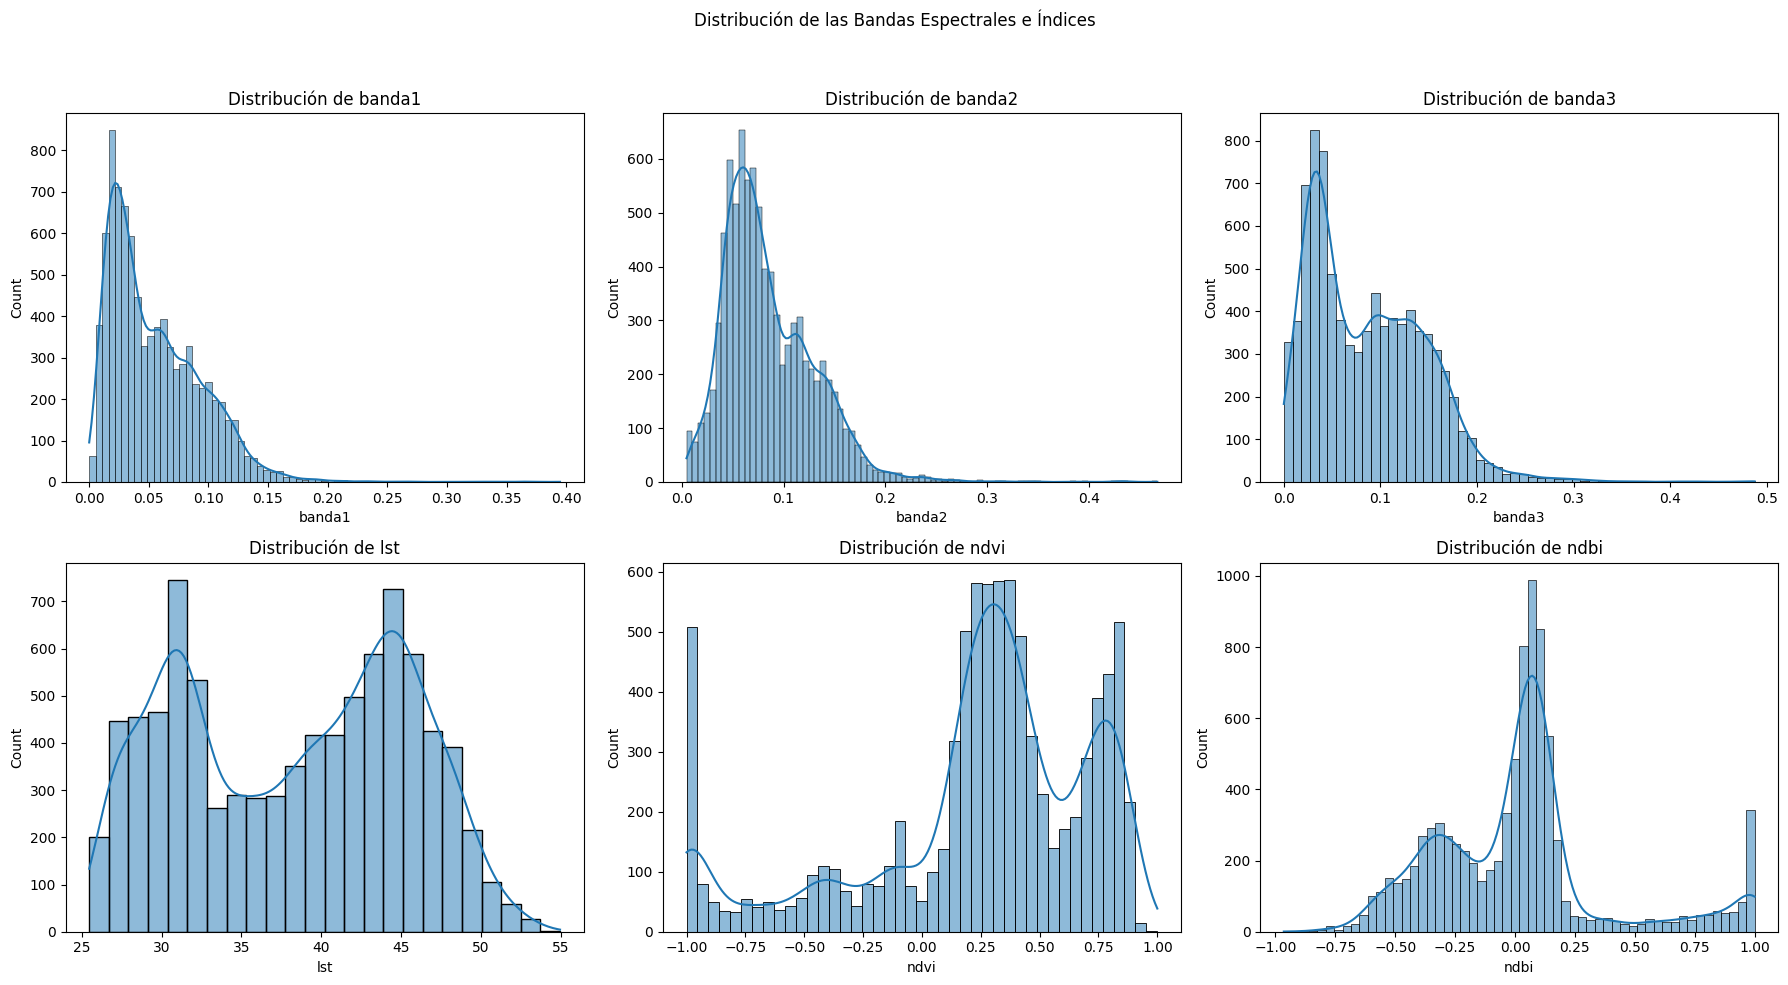

In [41]:
## 2.2 Visualización de la distribución de las bandas espectrales e índices
features = ["banda1", "banda2", "banda3", "lst", "ndvi", "ndbi"]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distribución de las Bandas Espectrales e Índices")

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Distribución de {feature}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\jonny\AppData\Local\Temp\ipykernel_13604\2527677043.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


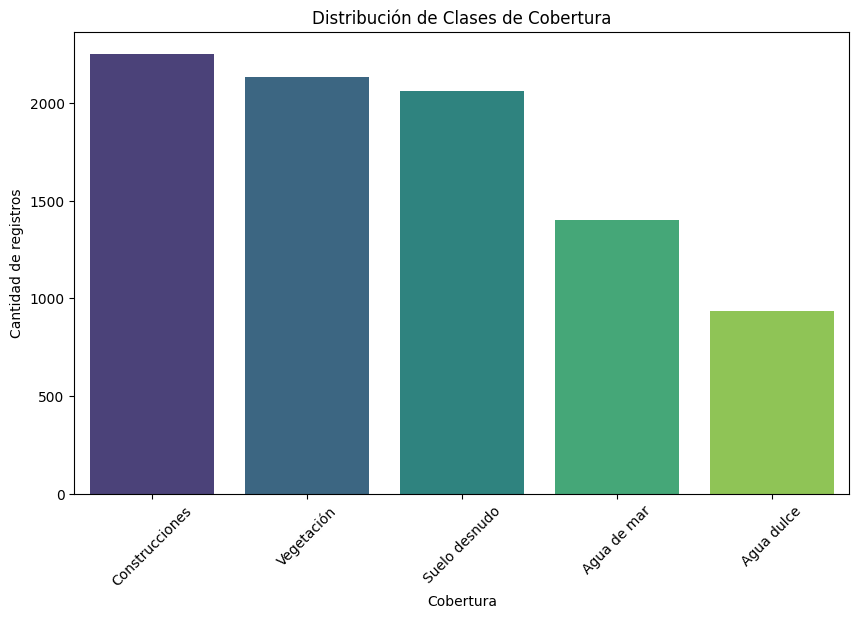

In [42]:
## 2.3 Distribución de clases en la variable objetivo
class_counts = df["cobertura"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Cobertura")
plt.ylabel("Cantidad de registros")
plt.title("Distribución de Clases de Cobertura")
plt.xticks(rotation=45)
plt.show()

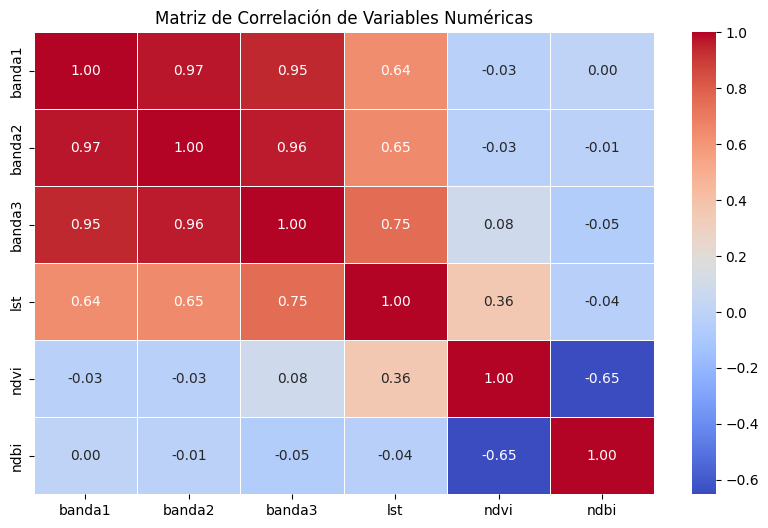

In [43]:
## 2.4 Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

In [44]:
## 3.2 Codificación de la variable objetivo
le = LabelEncoder()
df["cobertura_encoded"] = le.fit_transform(df["cobertura"])

In [45]:
# 4. División en conjunto de entrenamiento y prueba (80% - 20%)
X = df[features]
y = df["cobertura_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 5. Modelos de clasificación
## 5.1 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del modelo Random Forest: {accuracy_rf:.4f}")
print("\nReporte de clasificación Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Una red neural sencilla - to do   
# tiempo de computo para el entrenamiento y para la inferencia - to do
# Utilizando K-Fold Cross Validation 10 Veces - to do
# Mostras las fechas de las muestras de entrenamiento para comprobar que el modelo es multi-temporal Enfatizar en el documento de tesis realizar una tabla para indicar las muestras- to do
## Generar matriz de confusión en rangos de color hitmap para el mejor modelos para cada algoritmo - to do


Precisión del modelo Random Forest: 0.9727

Reporte de clasificación Random Forest:
                precision    recall  f1-score   support

   Agua de mar       0.99      0.97      0.98       281
    Agua dulce       0.95      0.98      0.97       187
Construcciones       0.98      0.96      0.97       450
 Suelo desnudo       0.96      0.98      0.97       412
    Vegetación       0.98      0.98      0.98       427

      accuracy                           0.97      1757
     macro avg       0.97      0.97      0.97      1757
  weighted avg       0.97      0.97      0.97      1757



In [47]:
## 5.2 Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Precisión del modelo Gradient Boosting: {accuracy_gb:.4f}")
print("\nReporte de clasificación Gradient Boosting:")
print(classification_report(y_test, y_pred_gb, target_names=le.classes_))

Precisión del modelo Gradient Boosting: 0.9653

Reporte de clasificación Gradient Boosting:
                precision    recall  f1-score   support

   Agua de mar       0.99      0.95      0.97       281
    Agua dulce       0.92      0.98      0.95       187
Construcciones       0.98      0.96      0.97       450
 Suelo desnudo       0.95      0.97      0.96       412
    Vegetación       0.98      0.97      0.97       427

      accuracy                           0.97      1757
     macro avg       0.96      0.97      0.96      1757
  weighted avg       0.97      0.97      0.97      1757



In [55]:
def cargar_banda(path):
    with rasterio.open(path) as src:
        return src.read(), src.profile

path = 'C:/Users/jonny/Documentos/MAESTRIA/TESIS/12-machine_learning/barranquilla'

for folder_name in os.listdir(path):
    folder_path = os.path.join(path,folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith("RGB.TIF"):
                rgb_file = os.path.join(folder_path,file_name)
            if file_name.endswith("LST.TIF"):
                lst_file = os.path.join(folder_path,file_name)
            if file_name.endswith("NDVI.TIF"):
                ndvi_file = os.path.join(folder_path,file_name)
            if file_name.endswith("NDBI.TIF"):
                ndbi_file = os.path.join(folder_path,file_name)
        
        rgb, perfil = cargar_banda(rgb_file)
        lst, _ = cargar_banda(lst_file)
        ndvi, _ = cargar_banda(ndvi_file)
        ndbi, _ = cargar_banda(ndbi_file)
        
        assert rgb.shape[1:] == lst.shape[1:] == ndvi.shape[1:] == ndbi.shape[1:], "Las dimensiones no coinciden."

        multiband = np.concatenate((rgb, lst, ndvi, ndbi), axis=0)
        num_bands, alto, ancho = multiband.shape
        
        data = multiband.reshape(num_bands, -1).T
        columns = ['banda1', 'banda2', 'banda3', 'lst', 'ndvi', 'ndbi']
        df = pd.DataFrame(data, columns=columns)

        prediciones_rf = rf_model.predict(df)
        classification_rf = prediciones_rf.reshape(alto, ancho)
        
        perfil.update(dtype=rasterio.uint8, count=1, height=int(alto), width=int(ancho))

        with rasterio.open(os.path.join(folder_path,"RF_Classification.TIF"), "w", **perfil) as dst:
            dst.write(classification_rf.astype(np.uint8), 1)
            print("Procesado: ", folder_path, "RF_Classification.TIF")

Procesado:  C:/Users/jonny/Documentos/MAESTRIA/TESIS/12-machine_learning/barranquilla\LC08_L2SP_009052_20150401_20200909_02_T1 RF_Classification.TIF
Procesado:  C:/Users/jonny/Documentos/MAESTRIA/TESIS/12-machine_learning/barranquilla\LC08_L2SP_009052_20160114_20200907_02_T1 RF_Classification.TIF
Procesado:  C:/Users/jonny/Documentos/MAESTRIA/TESIS/12-machine_learning/barranquilla\LC08_L2SP_009052_20170116_20200905_02_T1 RF_Classification.TIF
Procesado:  C:/Users/jonny/Documentos/MAESTRIA/TESIS/12-machine_learning/barranquilla\LC08_L2SP_009052_20180204_20200902_02_T1 RF_Classification.TIF
Procesado:  C:/Users/jonny/Documentos/MAESTRIA/TESIS/12-machine_learning/barranquilla\LC08_L2SP_009052_20190106_20200830_02_T1 RF_Classification.TIF
Procesado:  C:/Users/jonny/Documentos/MAESTRIA/TESIS/12-machine_learning/barranquilla\LC08_L2SP_009052_20200329_20200822_02_T1 RF_Classification.TIF
Procesado:  C:/Users/jonny/Documentos/MAESTRIA/TESIS/12-machine_learning/barranquilla\LC08_L2SP_009052_202

In [56]:
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Codificación de 'cobertura':", mapping)

Codificación de 'cobertura': {'Agua de mar': 0, 'Agua dulce': 1, 'Construcciones': 2, 'Suelo desnudo': 3, 'Vegetación': 4}
